In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Data ingestion
df = pd.read_csv("data/health_data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
## Dropping Id column
df.drop(columns='id',axis=1,inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


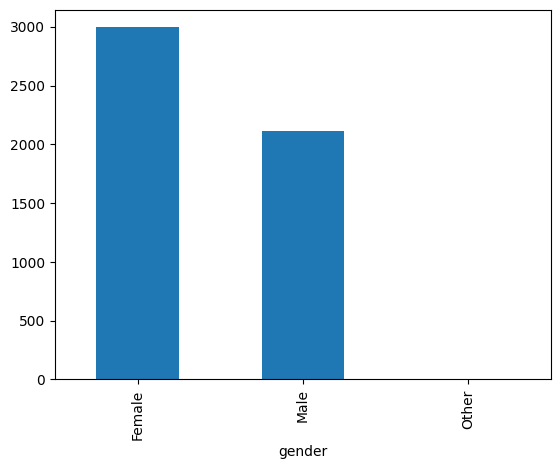

In [5]:
## Analysis of gender column
df['gender'].value_counts().plot(kind='bar')
plt.show()

In [6]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [7]:
## Dropping Other from gender column
df = df[df['gender'] != "Other"]
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


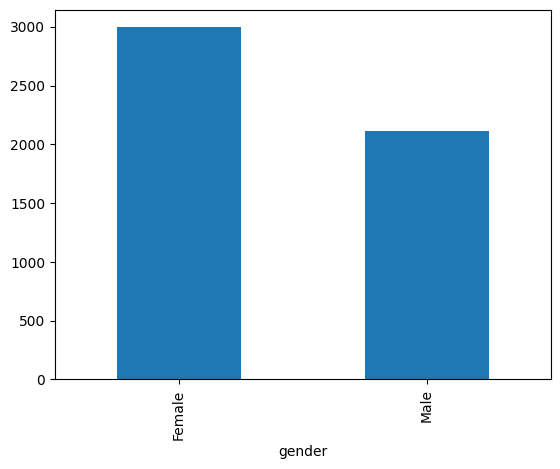

In [8]:
## Analysis of gender column
df['gender'].value_counts().plot(kind='bar')
plt.show()

In [9]:
## checking the data types of the given column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


In [10]:
## Checking the null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
## Dropping the null values
df.dropna(axis=0,inplace=True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
## Checking the unique values of the categorical columns
print(df['gender'].unique())
print(df['work_type'].unique())
print(df['Residence_type'].unique())
print(df['smoking_status'].unique())
print(df['ever_married'].unique())

['Male' 'Female']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Yes' 'No']


In [13]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [14]:
df['hypertension'].unique()

array([0, 1], dtype=int64)

In [15]:
df['hypertension'] = df['hypertension'].apply(lambda x:"yes" if x==1 else "no")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,no,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,no,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,no,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,yes,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,no,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [16]:
df['hypertension'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
df['heart_disease'] = df['heart_disease'].apply(lambda x:"yes" if x==1 else "no")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,no,yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,no,yes,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,no,no,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,yes,no,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,no,no,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Exploratory Data analysis of Categorical column

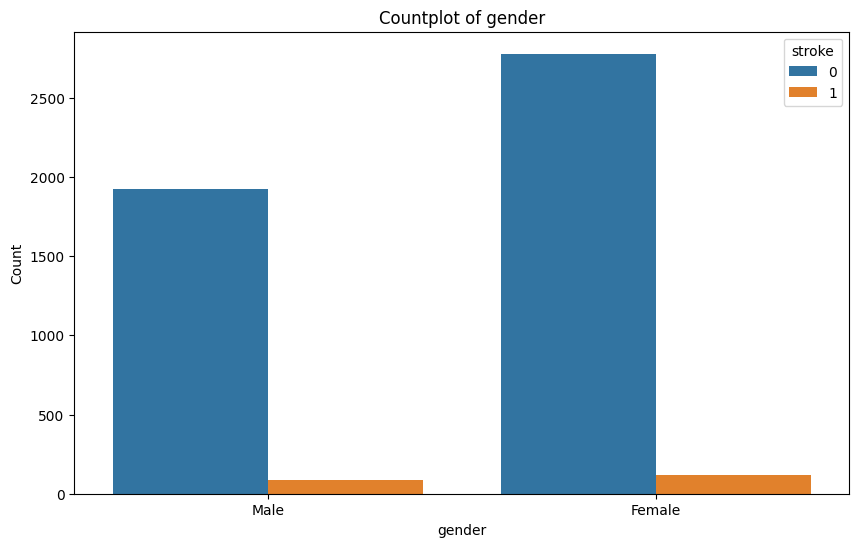

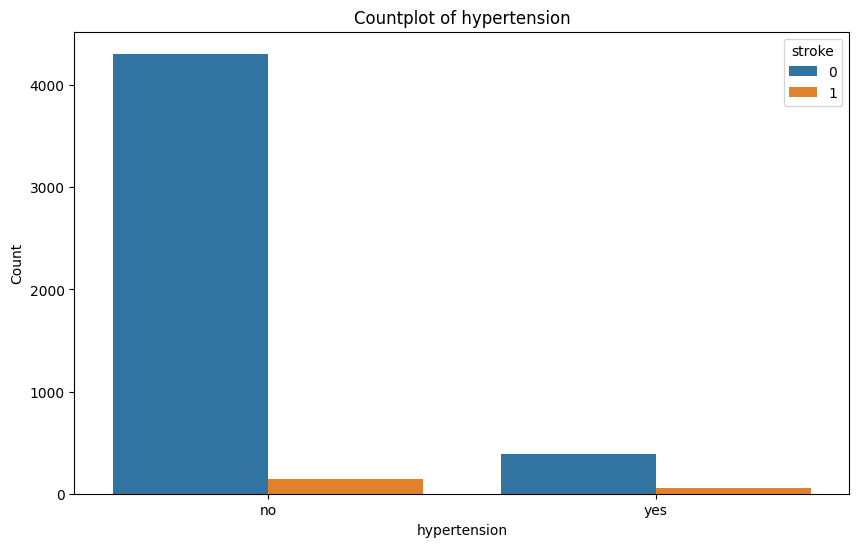

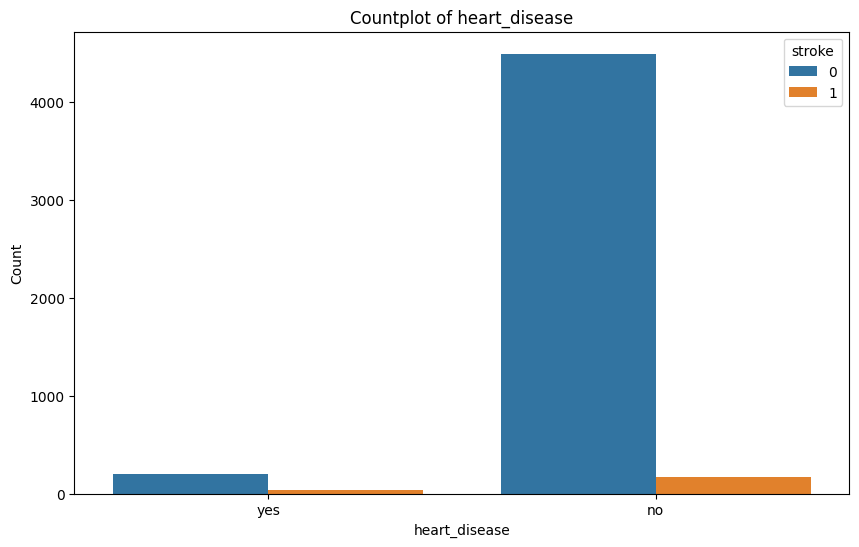

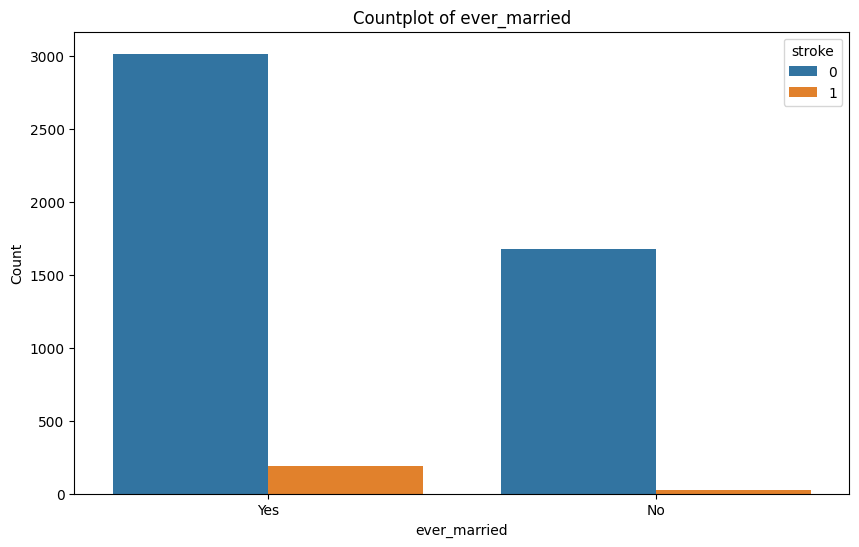

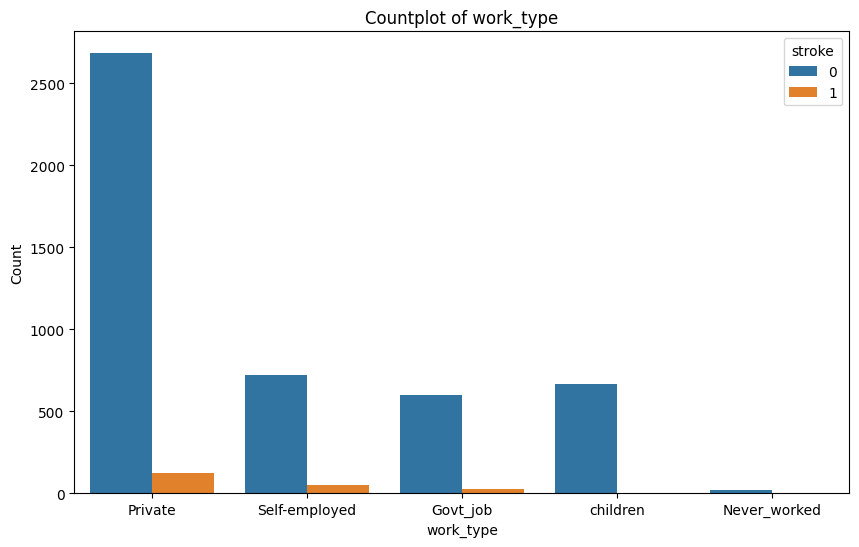

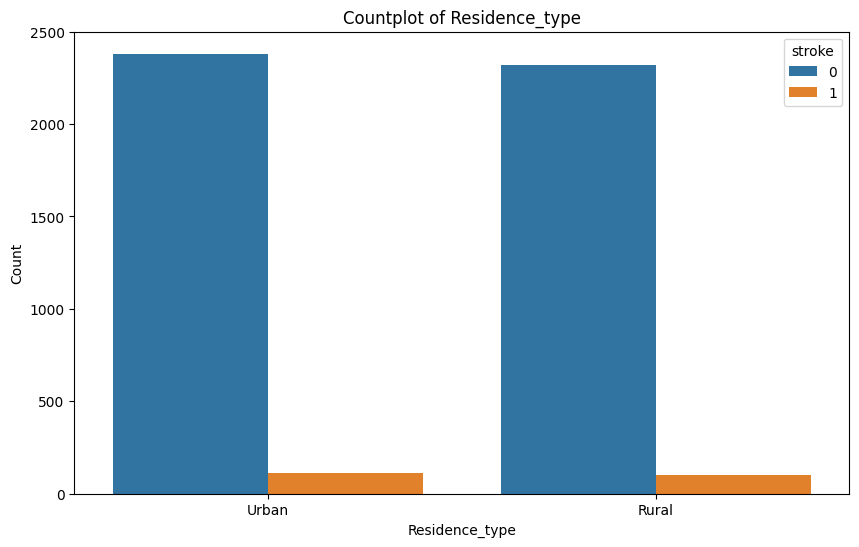

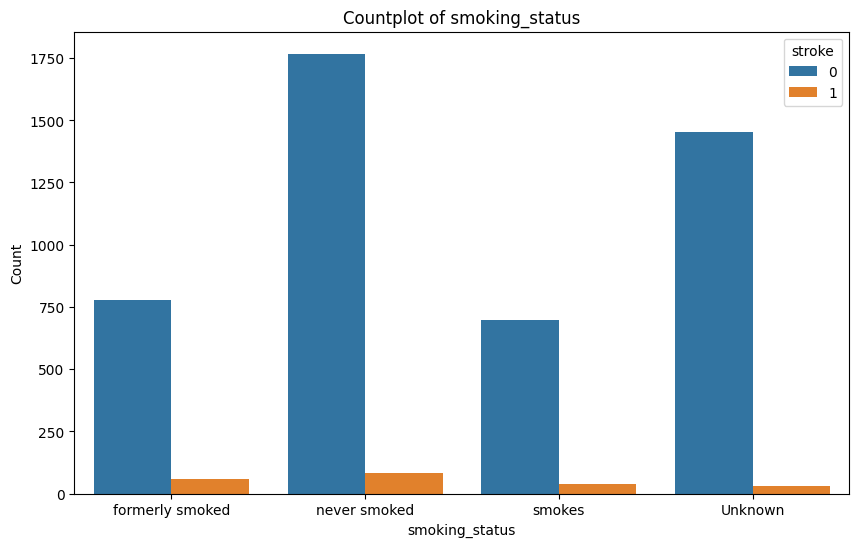

In [18]:
for col in df.columns:
    if df[col].dtype == "object":
        plt.figure(figsize=(10, 6))
        sns.countplot(x=df[col],hue=df['stroke'])
        plt.title(f"Countplot of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()
        

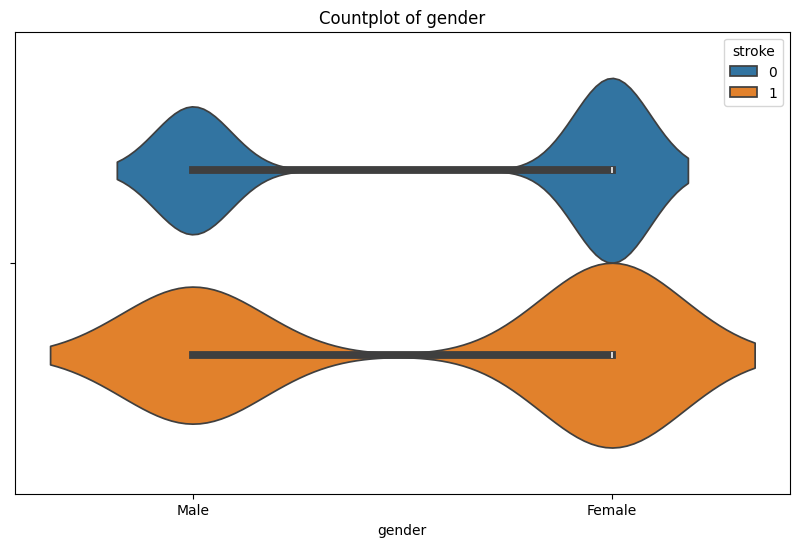

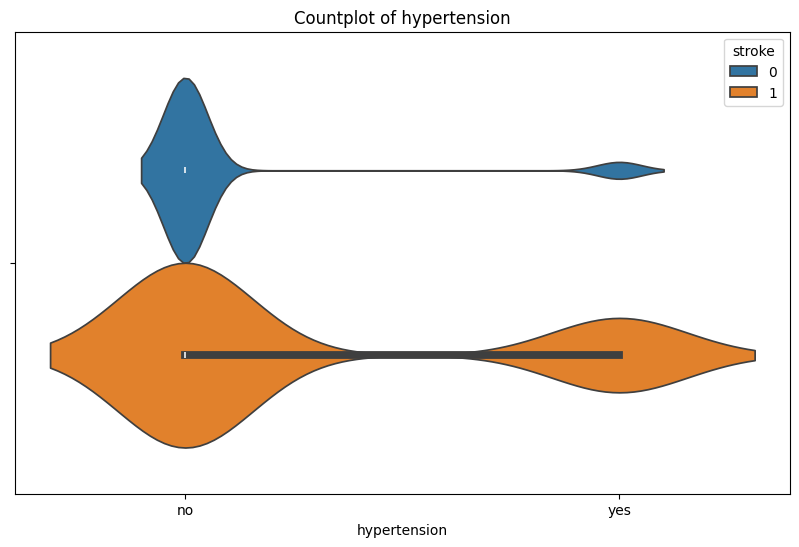

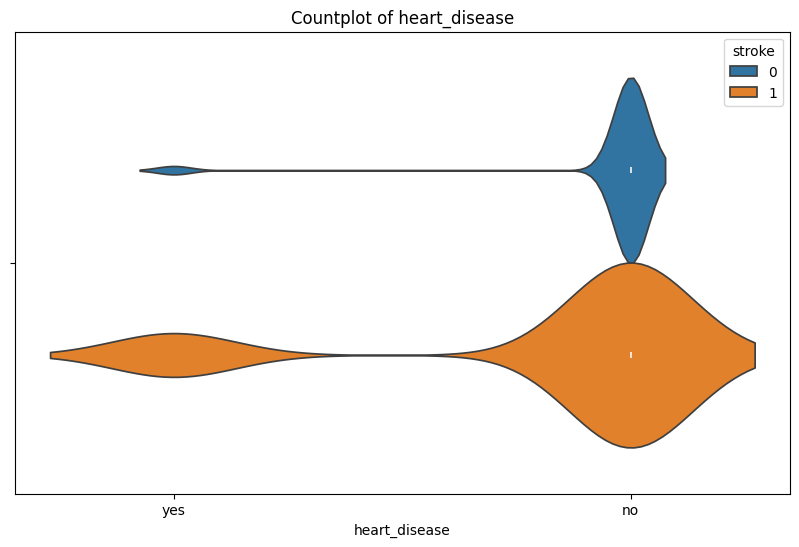

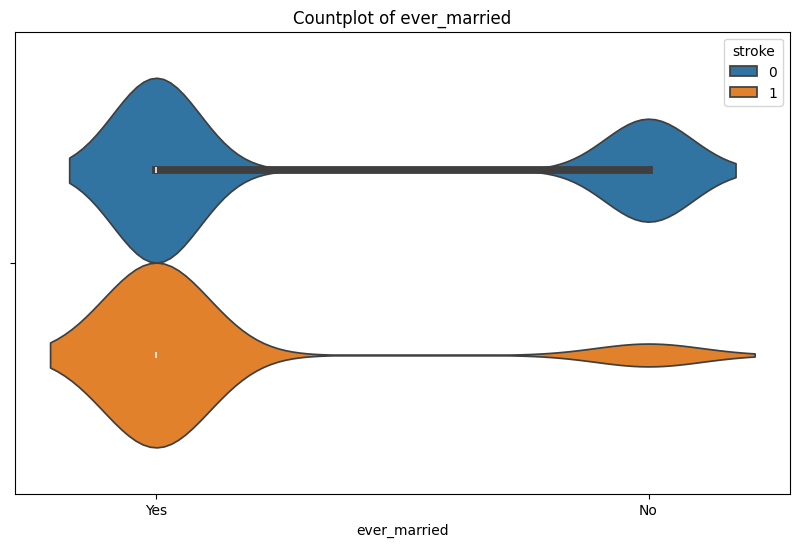

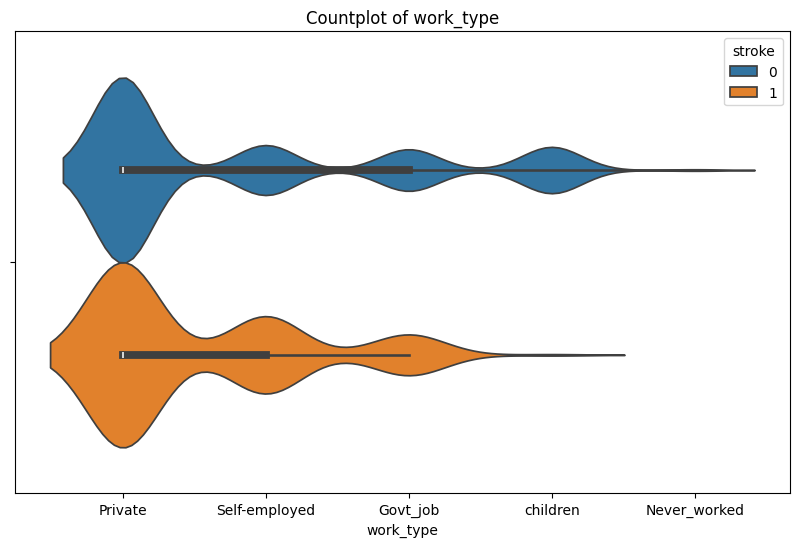

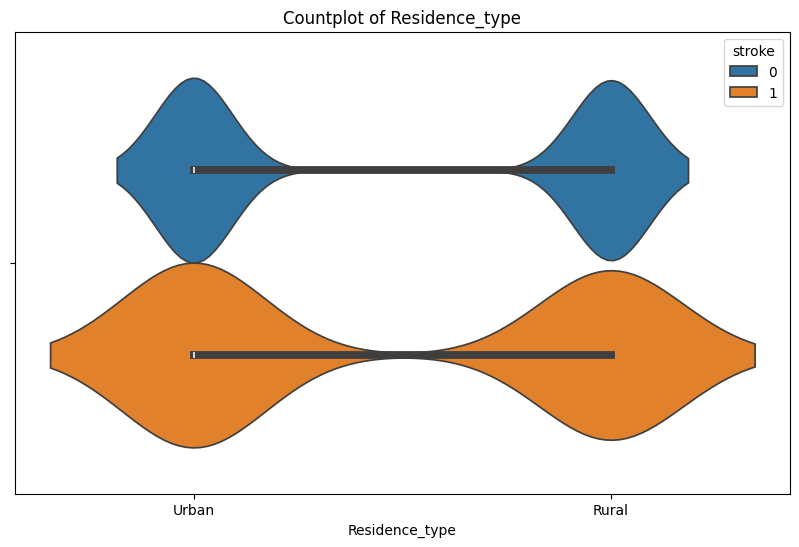

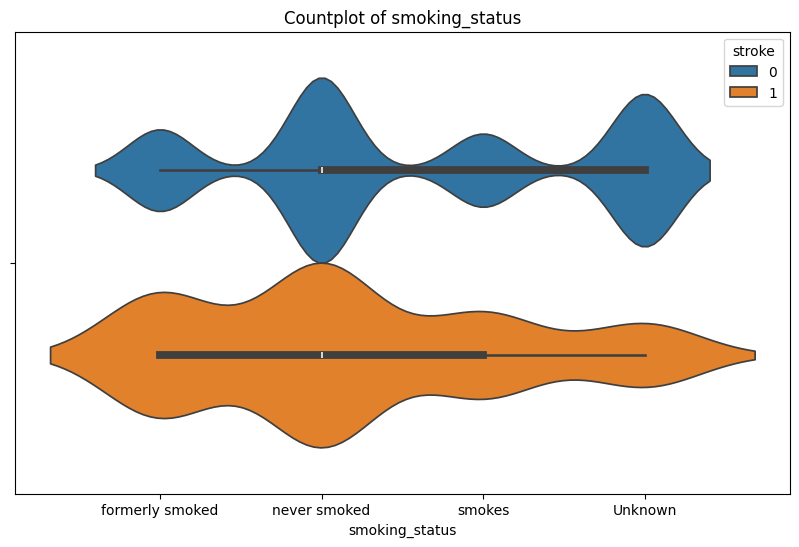

In [19]:
for col in df.columns:
    if df[col].dtype == "object":
        plt.figure(figsize=(10, 6))
        sns.violinplot(x=df[col],hue=df['stroke'])
        plt.title(f"Countplot of {col}")
        plt.xlabel(col)
        plt.show()
        

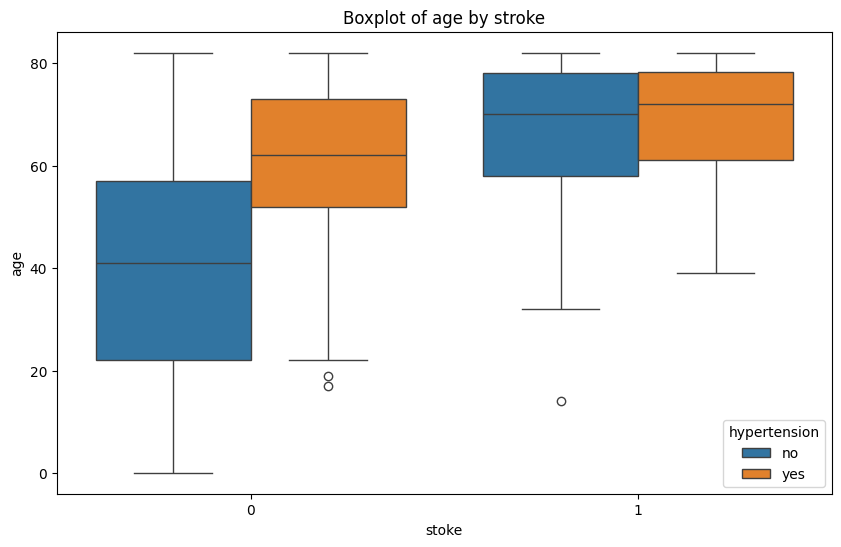

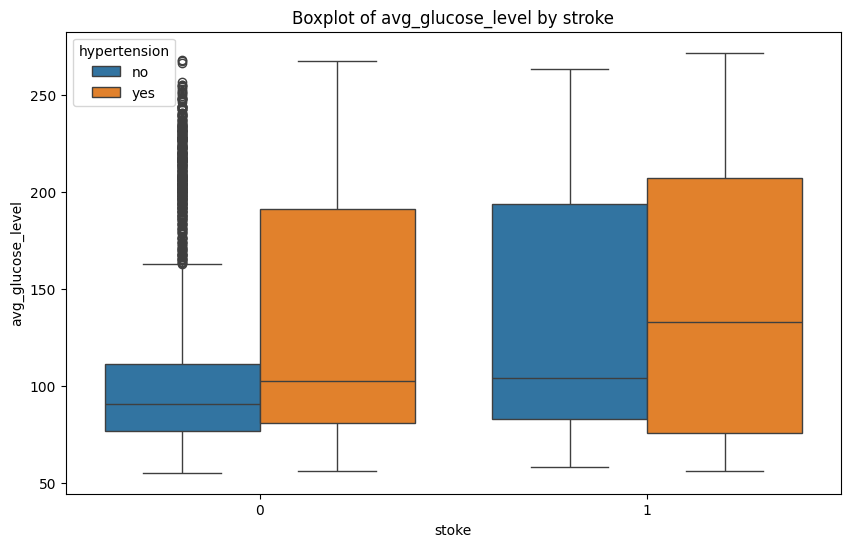

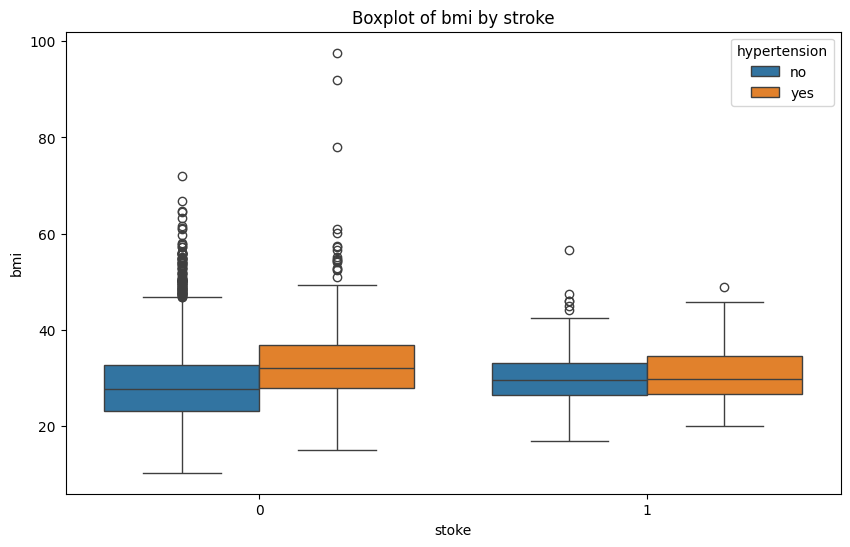

In [20]:
## Boxplot of numerical column and stroke with hue hypertension 
for col in df.columns:
    if df[col].dtype == "int" or df[col].dtype == "float":
        if col == "sroke":
            pass
        else:           
           plt.figure(figsize=(10, 6))
           sns.boxplot(x='stroke', y=col, data=df,hue="hypertension")
           plt.title(f"Boxplot of {col} by stroke")
           plt.xlabel("stoke")
           plt.ylabel(col)
           plt.show()
        

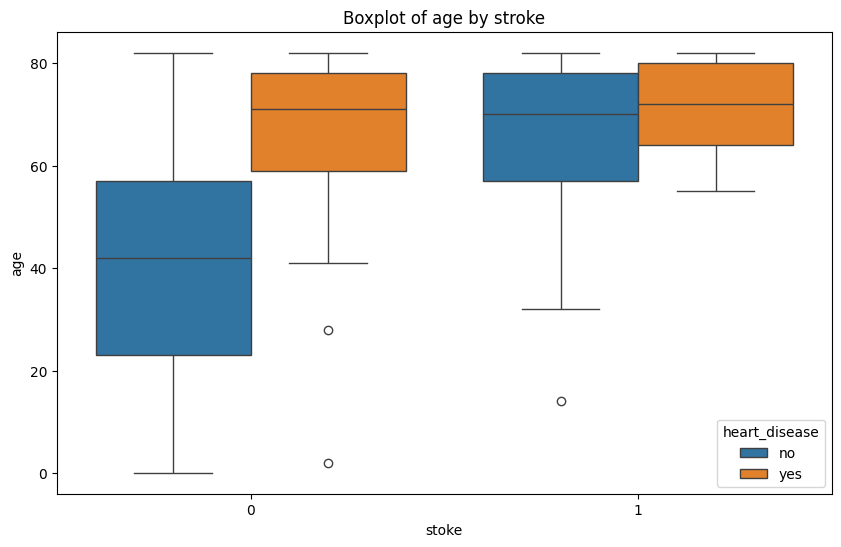

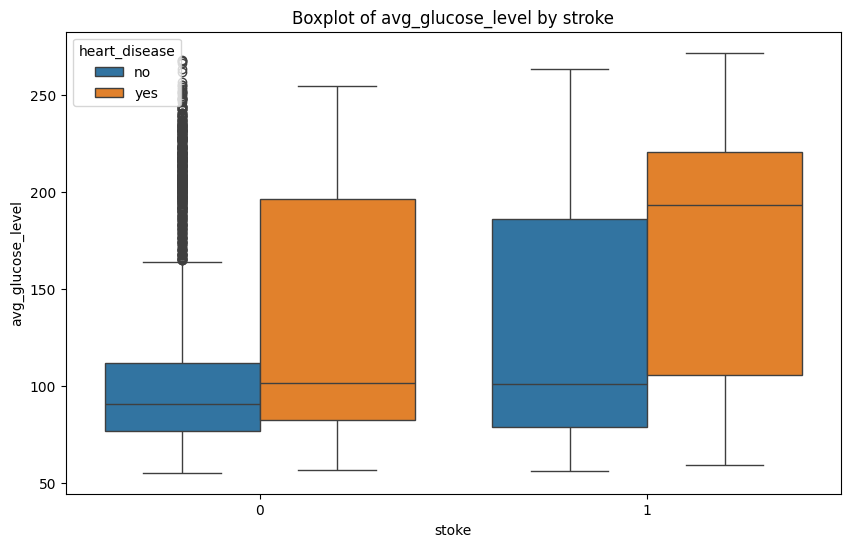

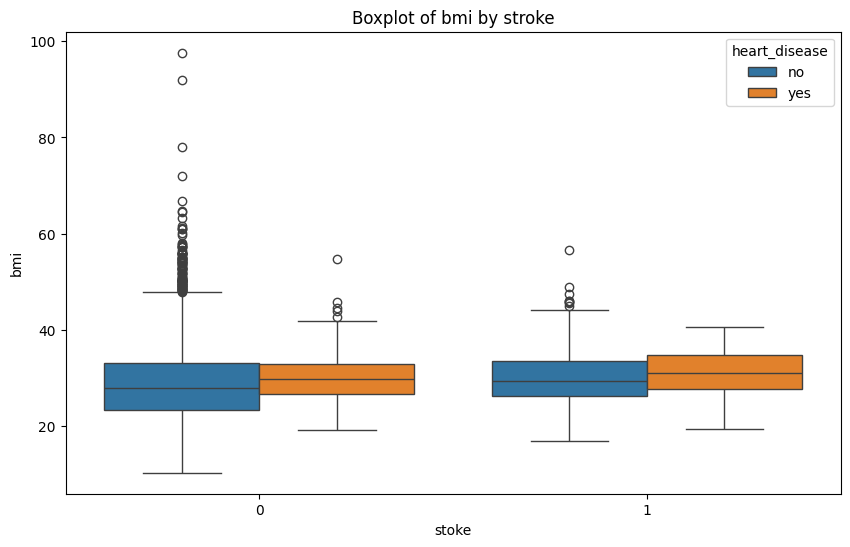

In [21]:
## Boxplot of numerical column and stroke with hue heart_deasease 
for col in df.columns:
    if df[col].dtype == "int" or df[col].dtype == "float":
        if col == "sroke":
            pass
        else:           
           plt.figure(figsize=(10, 6))
           sns.boxplot(x='stroke', y=col, data=df,hue="heart_disease")
           plt.title(f"Boxplot of {col} by stroke")
           plt.xlabel("stoke")
           plt.ylabel(col)
           plt.show()

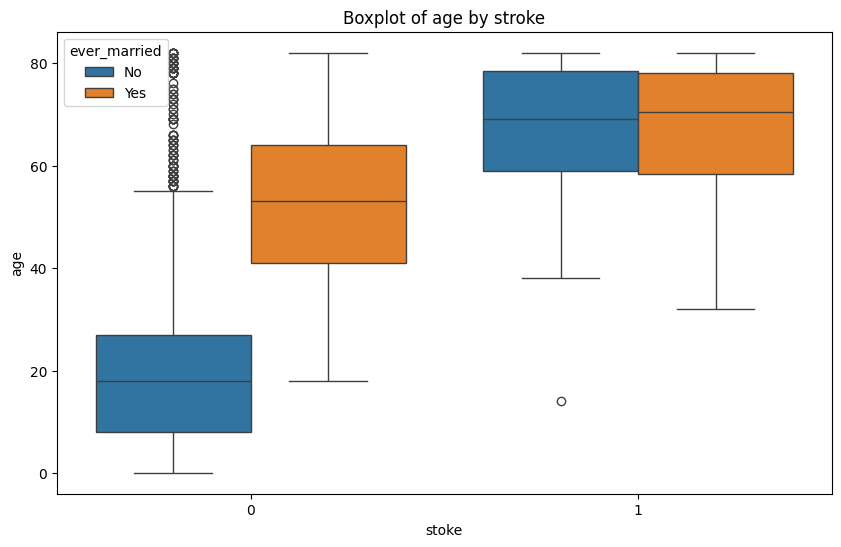

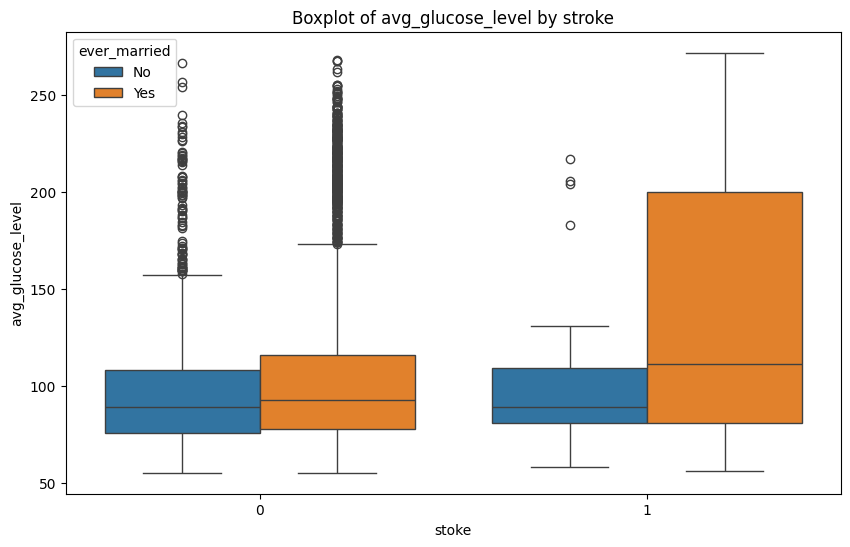

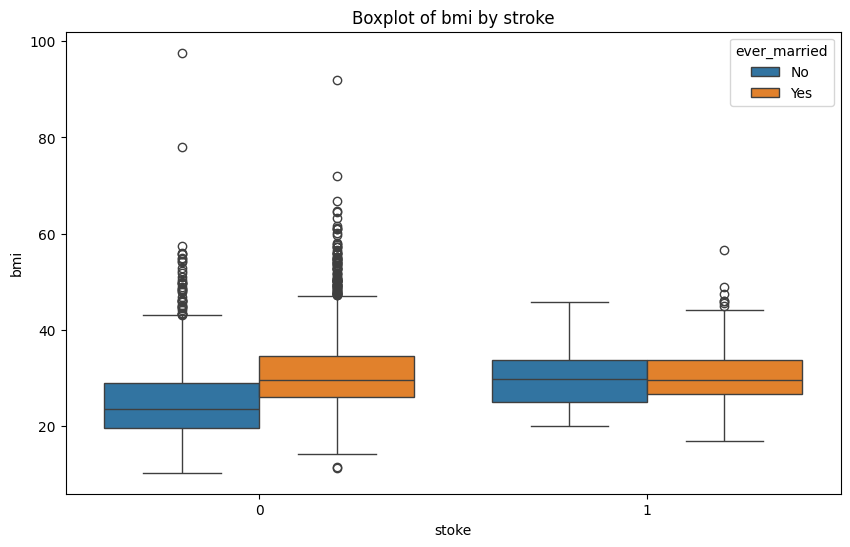

In [22]:
## Boxplot of numerical column and stroke with hue ever married
for col in df.columns:
    if df[col].dtype == "int" or df[col].dtype == "float":
        if col == "sroke":
            pass
        else:           
           plt.figure(figsize=(10, 6))
           sns.boxplot(x='stroke', y=col, data=df,hue="ever_married")
           plt.title(f"Boxplot of {col} by stroke")
           plt.xlabel("stoke")
           plt.ylabel(col)
           plt.show()

In [23]:
## Checking the Correlation
df.corr(numeric_only=True)

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.236000,0.333314,0.232313
avg_glucose_level,0.236000,1.000000,0.175672,0.138984
bmi,0.333314,0.175672,1.000000,0.042341
stroke,0.232313,0.138984,0.042341,1.000000


<Axes: >

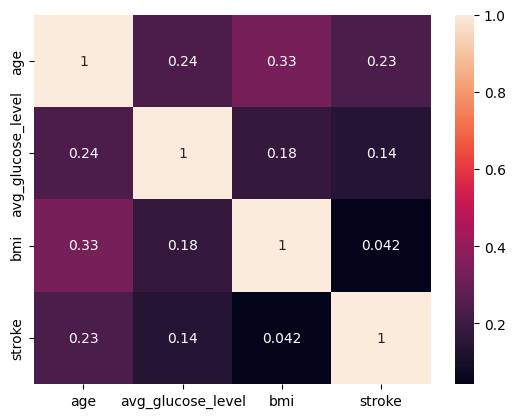

In [24]:
## Heatmap with numerical columns
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [25]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,no,yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,no,yes,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,no,no,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,yes,no,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,no,no,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [26]:
## Checking the duplicate value
df.duplicated().sum()

0

In [27]:
## Shaving the cleaned data
df.to_csv("data/cleaned_data.csv",index=False)

In [28]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [29]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [30]:
df['hypertension'].unique()

array(['no', 'yes'], dtype=object)

In [31]:
df['heart_disease'].unique()

array(['yes', 'no'], dtype=object)

In [32]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [34]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [35]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [36]:
df.shape

(4908, 11)